<a href="https://colab.research.google.com/github/Eric-Mendes/estatisticas-quem-cair-calil/blob/main/notebooks/estudo_das_escalacoes_times_serios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTUDO SOBRE AS ESCALAÇÕES**

In [1]:
RODADAS = 33

In [2]:
# importando as bibliotecas necessárias para estudar os dados
import numpy as np # matemática
import matplotlib.pyplot as plt # gráficos
import pandas as pd # tabelas

In [3]:
# importando os dados (do github)
url = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair-\
calil/main/data/escalacoes_times_serios_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df = pd.read_csv(url)
 
# informações da tabela
df.head()

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
0,Gigante de JF,RODADA 33,RICHARD,GOLEIRO,-4.2,NÃO,CEARÁ
1,Gigante de JF,RODADA 33,CALEGARI,LATERAL,5.8,NÃO,FLUMINENSE
2,Gigante de JF,RODADA 33,GUILHERME ARANA,LATERAL,12.6,NÃO,ATLÉTICO MINEIRO
3,Gigante de JF,RODADA 33,LUCCAS CLARO,ZAGUEIRO,5.6,NÃO,FLUMINENSE
4,Gigante de JF,RODADA 33,JÚNIOR ALONSO,ZAGUEIRO,4.6,NÃO,ATLÉTICO MINEIRO


**TRATAMENTO DOS DADOS**

Tornando 'RODADA' um número inteiro:

In [4]:
df.RODADA = list(map(lambda x: int(x.split(' ')[1]), df.RODADA))
df.head()

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
0,Gigante de JF,33,RICHARD,GOLEIRO,-4.2,NÃO,CEARÁ
1,Gigante de JF,33,CALEGARI,LATERAL,5.8,NÃO,FLUMINENSE
2,Gigante de JF,33,GUILHERME ARANA,LATERAL,12.6,NÃO,ATLÉTICO MINEIRO
3,Gigante de JF,33,LUCCAS CLARO,ZAGUEIRO,5.6,NÃO,FLUMINENSE
4,Gigante de JF,33,JÚNIOR ALONSO,ZAGUEIRO,4.6,NÃO,ATLÉTICO MINEIRO


Checando se há escalado sem time:

In [5]:
df.loc[df.TIME == '']

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME


Não há!

Tirando o dobro da pontuação dos capitães para não enviesar as análises:

In [6]:
df['PONTUAÇÃO'].loc[df['CAPITÃO'] == 'SIM'] = list(map(lambda x: x/2, list(df['PONTUAÇÃO'].loc[df['CAPITÃO'] == 'SIM'])))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


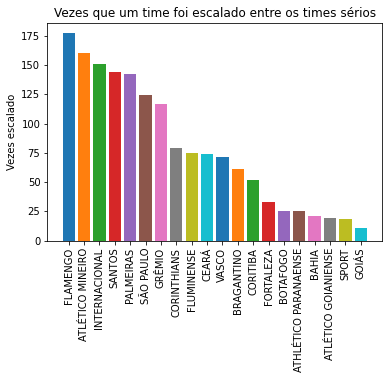

In [52]:
import seaborn as sns
from collections import Counter

vezes_time = Counter(df['TIME'])
vezes_time = vezes_time.most_common()
vezes_time = list(zip(*vezes_time[:-1]))

plt.xticks(rotation='vertical')
plt.ylabel('Vezes escalado')
plt.title('Vezes que um time foi escalado entre os times sérios')

plt.bar(vezes_time[0], vezes_time[1], color=sns.color_palette("tab10"))
plt.show()

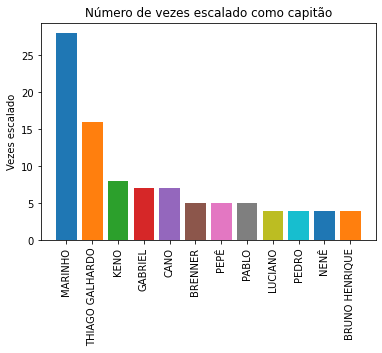

In [45]:
vezes_cap = Counter(df['JOGADOR'].loc[df['CAPITÃO'] == 'SIM'])
vezes_cap = list(zip(*vezes_cap.most_common()))

plt.xticks(rotation='vertical')
plt.ylabel('Vezes escalado')
plt.title('Número de vezes escalado como capitão')
plt.bar(vezes_cap[0][:12], vezes_cap[1][:12], color=sns.color_palette("tab10"))
plt.show()

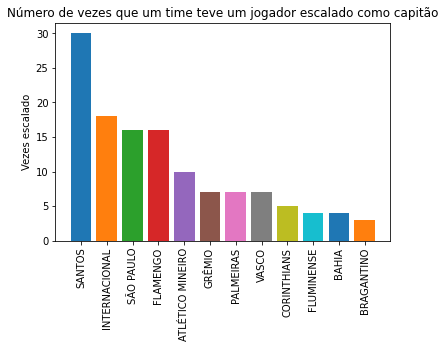

In [54]:
vezes_cap = Counter(df['TIME'].loc[df['CAPITÃO'] == 'SIM'])
vezes_cap = list(zip(*vezes_cap.most_common()))

plt.xticks(rotation='vertical')
plt.ylabel('Vezes escalado')
plt.title('Número de vezes que um time teve um jogador escalado como capitão')
plt.bar(vezes_cap[0][:12], vezes_cap[1][:12], color=sns.color_palette("tab10"))
plt.show()

In [ ]:
def plot_times_escalados(equipe):
  times = np.unique(list(df['TIME'].loc[(df['EQUIPE'] == equipe)]))

  plot_data = []
  for time in times:
    plot_data.append((time, df['TIME'].loc[(df['EQUIPE'] == equipe) & (df['TIME'] == time)].count()))

  plot_data = sorted(plot_data, reverse=True, key=lambda tup: tup[1])
  time = []
  vez = []

  for i in range(len(plot_data)):
    time.append(plot_data[i][0])
    vez.append(plot_data[i][1])


  plt.ylabel('Vezes escalado')
  N = len(time[:12])
  ind = np.arange(N)
  plt.xticks(ind, time[:12], rotation='vertical')
  plt.yticks(np.arange(0, max(vez[:12])+2, 5))
  plt.title('Os 12 times mais escalados ({})'.format(equipe))
  plt.bar(time[:12], vez[:12], color=['blue', 'yellow', 'green', 'purple',
                      'aqua', 'navajowhite', 'black', 'brown',
                      'palegreen', 'darkolivegreen', 'deepskyblue', 'red',
                      'magenta', 'navy', 'greenyellow', 'pink',
                      'peachpuff', 'thistle', 'grey', 'gold'])
  plt.show()

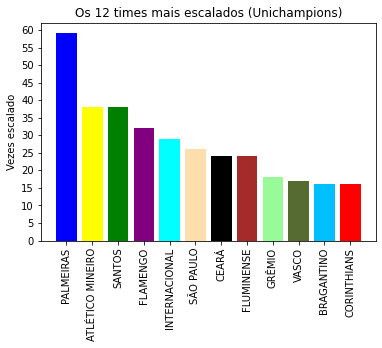

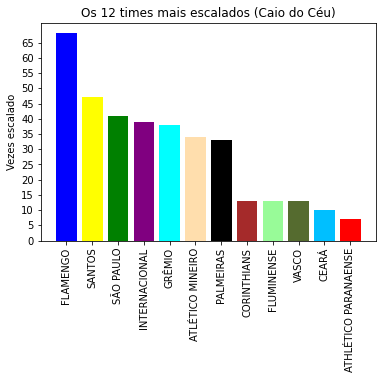

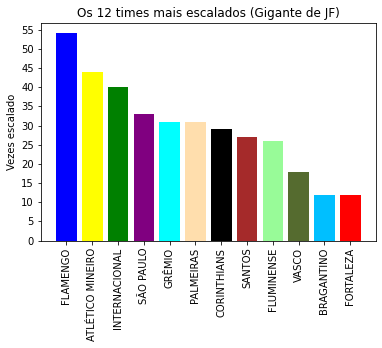

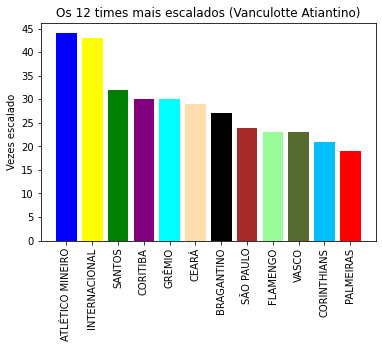

In [ ]:
plot_times_escalados('Unichampions')
plot_times_escalados('Caio do Céu')
plot_times_escalados('Gigante de JF')
plot_times_escalados('Vanculotte Atiantino')

In [ ]:
def plot_jogadores(time, equipe):
  tam = 12
  jogs = np.unique(list(df['JOGADOR'].loc[(df.EQUIPE == equipe) & (df.TIME == time)]))
  if len(jogs) < 12:
    tam = len(jogs)
  plot_data = []
  for jog in jogs:
    plot_data.append((jog, df['JOGADOR'].loc[(df['EQUIPE'] == equipe) & (df['JOGADOR'] == jog)].count()))



  plot_data = sorted(plot_data, reverse=True, key=lambda tup: tup[1])
  j = []
  vez = []

  for i in range(len(plot_data)):
    j.append(plot_data[i][0])
    vez.append(plot_data[i][1])


  plt.ylabel('Vezes escalado')
  N = len(j[:tam])
  ind = np.arange(N)
  plt.xticks(ind, j[:tam], rotation='vertical')
  plt.yticks(np.arange(0, max(vez[:tam])+2, 1))
  plt.title('Os {} jogadores mais escalados do {} ({})'.format(tam, time, equipe))
  plt.bar(j[:tam], vez[:tam], color=['blue', 'yellow', 'green', 'purple',
                      'aqua', 'navajowhite', 'black', 'brown',
                      'palegreen', 'darkolivegreen', 'deepskyblue', 'red',
                      'magenta', 'navy', 'greenyellow', 'pink',
                      'peachpuff', 'thistle', 'grey', 'gold'])
  plt.show()

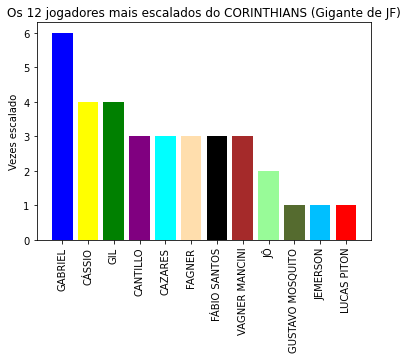

In [ ]:
plot_jogadores('CORINTHIANS', 'Gigante de JF')

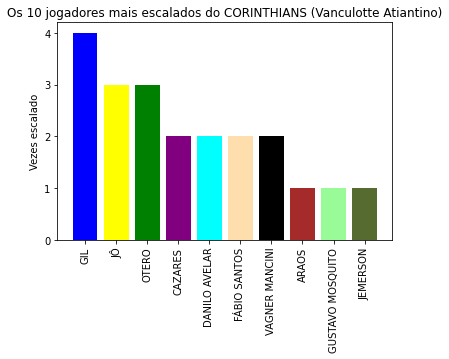

In [ ]:
plot_jogadores('CORINTHIANS', 'Vanculotte Atiantino')

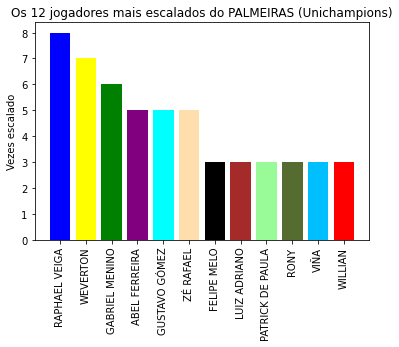

In [ ]:
plot_jogadores('PALMEIRAS', 'Unichampions')

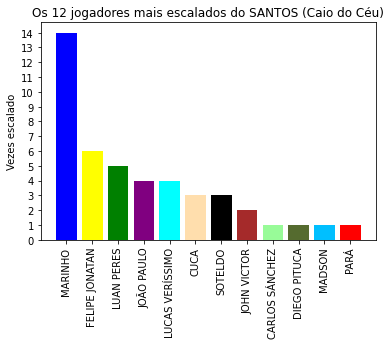

In [ ]:
plot_jogadores('SANTOS', 'Caio do Céu')

**CONTRIBUIÇÃO DOS 4 TIMES MAIS ESCALADOS PARA A PONTUAÇÃO TOTAL DAQUELA EQUIPE**

Vanculotte Atiantino

In [ ]:
coxa = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "CORITIBA")].sum()
              
atl = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "ATLÉTICO MINEIRO")].sum()

inter = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "INTERNACIONAL")].sum()
                  
santos = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "SANTOS")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino")].sum()

Porcentagem que contribuiu para a pontuação total (Vanculotte Atiantino)


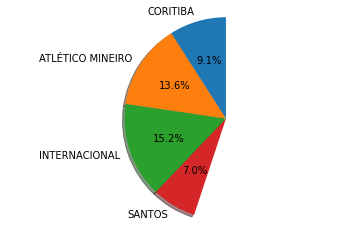

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'CORITIBA', 'ATLÉTICO MINEIRO', 'INTERNACIONAL', 'SANTOS'
sizes = [coxa/total_time, atl/total_time, inter/total_time, santos/total_time]

print("Porcentagem que contribuiu para a pontuação total (Vanculotte Atiantino)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Unichampions

In [ ]:
pal = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "PALMEIRAS")].sum()
              
atl = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "ATLÉTICO MINEIRO")].sum()

fla = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "FLAMENGO")].sum()
                  
santos = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "SANTOS")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions")].sum()

Porcentagem que contribuiu para a pontuação total (Unichampions)


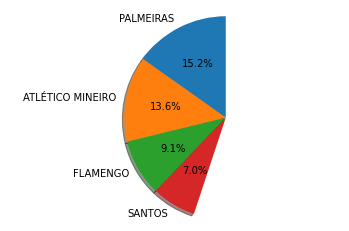

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'PALMEIRAS', 'ATLÉTICO MINEIRO', 'FLAMENGO', 'SANTOS'
sizes = [pal/total_time, atl/total_time, fla/total_time, santos/total_time]

print("Porcentagem que contribuiu para a pontuação total (Unichampions)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Gigante de JF

In [ ]:
inter = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "INTERNACIONAL")].sum()
              
atl = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "ATLÉTICO MINEIRO")].sum()

fla = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "FLAMENGO")].sum()
                  
spfc = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "SÃO PAULO")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF")].sum()

Porcentagem que contribuiu para a pontuação total (Gigante de JF)


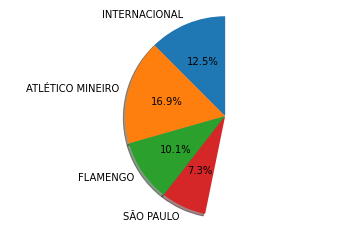

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'INTERNACIONAL', 'ATLÉTICO MINEIRO', 'FLAMENGO', 'SÃO PAULO'
sizes = [inter/total_time, atl/total_time, fla/total_time, spfc/total_time]

print("Porcentagem que contribuiu para a pontuação total (Gigante de JF)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Caio do Céu

In [ ]:
inter = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "INTERNACIONAL")].sum()
              
santos = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "SANTOS")].sum()

fla = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "FLAMENGO")].sum()
                  
spfc = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "SÃO PAULO")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu")].sum()

Porcentagem que contribuiu para a pontuação total (Caio do Céu)


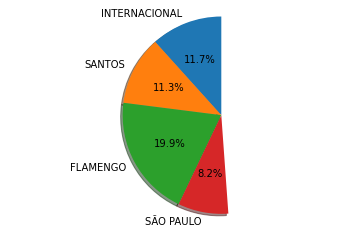

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'INTERNACIONAL', 'SANTOS', 'FLAMENGO', 'SÃO PAULO'
sizes = [inter/total_time, santos/total_time, fla/total_time, spfc/total_time]

print("Porcentagem que contribuiu para a pontuação total (Caio do Céu)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()